データの生成

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

np.random.seed(0)
tf.set_random_seed(0)

M = 2      # 入力データの次元
K = 3      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数


X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

In [2]:
import matplotlib.pyplot as plt
plt.plot(X1[:,0],X1[:,1],'o')
plt.plot(X2[:,0],X2[:,1],'o')
plt.plot(X3[:,0],X3[:,1],'o')

モデル設定

In [3]:
#入力次元とクラス数に合わせてW とK
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))
#入力と答えと出力の箱
x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)
#交差エントロピーの準備　GDOで最適化
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), axis=1))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
#分類が正しいか確認
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

モデル学習

In [4]:
# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 50  # ミニバッチサイズ
n_batches = N // batch_size

# ミニバッチ学習
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

学習結果の確認

In [5]:
X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]
()
output probability:
[[9.9868268e-01 1.3173167e-03 2.5878541e-10]
 [3.4313092e-03 9.6904927e-01 2.7519418e-02]
 [9.6915740e-01 3.0842548e-02 5.0909769e-08]
 [1.9351482e-02 9.7068453e-01 9.9640051e-03]
 [4.1215884e-09 8.5910317e-03 9.9140900e-01]
 [1.7154520e-02 9.7633582e-01 6.5096989e-03]
 [2.3086068e-07 4.2457715e-02 9.5754200e-01]
 [7.2534711e-08 8.8783978e-03 9.9112153e-01]
 [8.4302730e-12 1.4183823e-04 9.9985814e-01]
 [9.9589419e-01 4.1058036e-03 2.6871794e-09]]


In [6]:
print(sess.run(W),sess.run(b))

(array([[-1.0931293 ,  0.30058843,  0.7925412 ],
       [ 0.7954589 ,  0.29397675, -1.0894353 ]], dtype=float32), array([-0.05914815,  0.10808326, -0.04893514], dtype=float32))


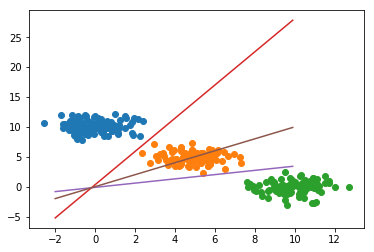

In [22]:
W_es = sess.run(W)
b_es = sess.run(b)
plot_x = np.arange(-2, 10, 0.1)
plt.plot(X1[:,0],X1[:,1],'o')
plt.plot(X2[:,0],X2[:,1],'o')
plt.plot(X3[:,0],X3[:,1],'o')
plt.plot(plot_x,(-(W_es[0,0] - W_es[0,1]) * plot_x - (b_es[0]-b_es[1])) /(W_es[1,0] - W_es[1,1]))
plt.plot(plot_x,(-(W_es[0,1] - W_es[0,2]) * plot_x - (b_es[1]-b_es[2])) /(W_es[1,1] - W_es[1,2]))
plt.plot(plot_x,(-(W_es[0,0] - W_es[0,2]) * plot_x - (b_es[0]-b_es[2])) /(W_es[1,0] - W_es[1,2]))

In [19]:
W_es[0,1]

0.30058843